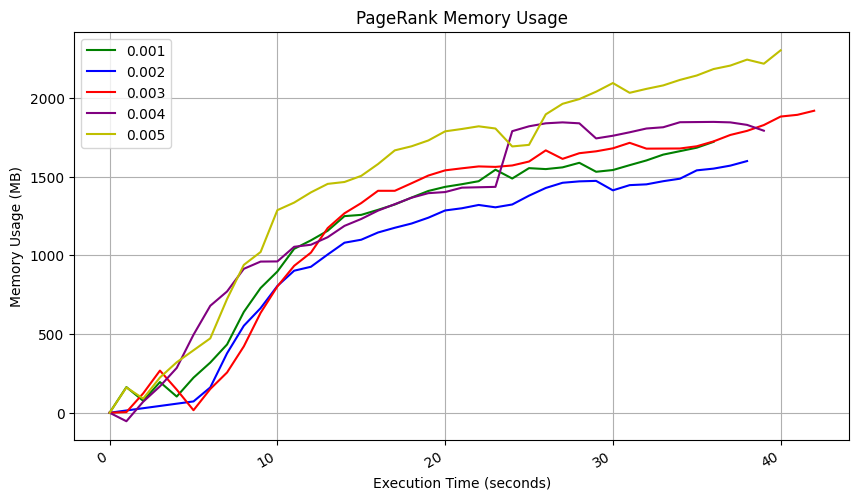

In [970]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

fileNames = ['../memory_logs/pr0.001.log','../memory_logs/pr0.002.log', '../memory_logs/pr0.003.log', '../memory_logs/pr0.004.log', '../memory_logs/pr0.005.log' ]

# Define colors for the plots
colors = ['g', 'b', 'r', 'purple', 'y']

# Initialize a figure for all plots
plt.figure(figsize=(10, 6))

custom_labels = ['0.001', '0.002', '0.003', '0.004', '0.005']
datasize = [3179136, 5323896, 9648216, 12910656, 15977688]
log_data_pagerank=[]

for i, fileName in enumerate(fileNames):
    timestamps = []
    memory_usage = []

    # Read the log file
    with open(fileName, 'r') as file:
        for line in file:
            timestamp_str, memory_str = line.split(' : ')
            timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
            memory = int(memory_str.replace(' MB', ''))
            timestamps.append(timestamp)
            memory_usage.append(memory)

    # Adjust memory usage by subtracting the first value
    first_memory_value = memory_usage[0]
    adjusted_memory_usage = [memory - first_memory_value for memory in memory_usage]
    max_memory_usage = max(adjusted_memory_usage)
    elapsed_seconds = [(timestamp - timestamps[0]).total_seconds() for timestamp in timestamps]
    # Calculate execution time in seconds
    execution_time = timestamps[-1] - timestamps[0]
    execution_time_seconds = execution_time.total_seconds()
    log_data_pagerank.append({
        'execution_time': execution_time,
        'max_memory_usage': max_memory_usage,
        'scale': custom_labels[i],
        'workload': 'pagerank_spark_huge',
        'datasize': datasize[i]
    })
    
    # Plotting the data with different colors
    plt.plot(elapsed_seconds, adjusted_memory_usage, color=colors[i], linestyle='-', label=custom_labels[i])

# Formatting the plot
plt.title('PageRank Memory Usage')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Memory Usage (MB)')
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


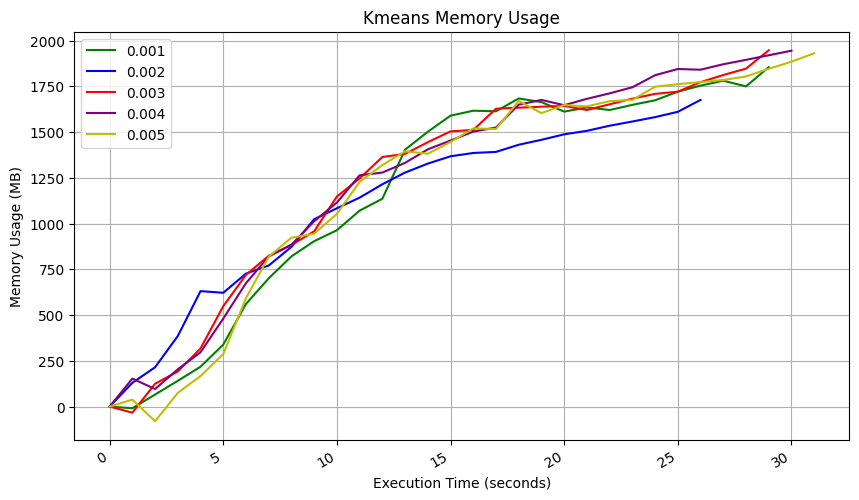

In [972]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

fileNames = ['../memory_logs/kmeans0.001.log','../memory_logs/kmeans0.002.log', '../memory_logs/kmeans0.003.log', '../memory_logs/kmeans0.004.log', '../memory_logs/kmeans0.005.log' ]

# Define colors for the plots
colors = ['g', 'b', 'r', 'purple', 'y']

# Initialize a figure for all plots
plt.figure(figsize=(10, 6))

custom_labels = ['0.001', '0.002', '0.003', '0.004', '0.005']
datasize = [19903883, 39807767, 59711651, 79615535, 99519419]

log_data_kmeans = []

for i, fileName in enumerate(fileNames):
    timestamps = []
    memory_usage = []

    # Read the log file
    with open(fileName, 'r') as file:
        for line in file:
            timestamp_str, memory_str = line.split(' : ')
            timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
            memory = int(memory_str.replace(' MB', ''))
            timestamps.append(timestamp)
            memory_usage.append(memory)

    # Adjust memory usage by subtracting the first value
    first_memory_value = memory_usage[0]
    adjusted_memory_usage = [memory - first_memory_value for memory in memory_usage]
    max_memory_usage = max(adjusted_memory_usage)

    elapsed_seconds = [(timestamp - timestamps[0]).total_seconds() for timestamp in timestamps]
    # Calculate execution time in seconds
    execution_time = timestamps[-1] - timestamps[0]
    execution_time_seconds = execution_time.total_seconds()
    log_data_kmeans.append({
        'execution_time': execution_time,
        'max_memory_usage': max_memory_usage,
        'scale': custom_labels[i],
        'workload': 'kmeans_huge',
        'datasize': datasize[i]
    })
    
    # Plotting the data with different colors
    plt.plot(elapsed_seconds, adjusted_memory_usage, color=colors[i], linestyle='-', label=custom_labels[i])

# Formatting the plot
plt.title('Kmeans Memory Usage')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Memory Usage (MB)')
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

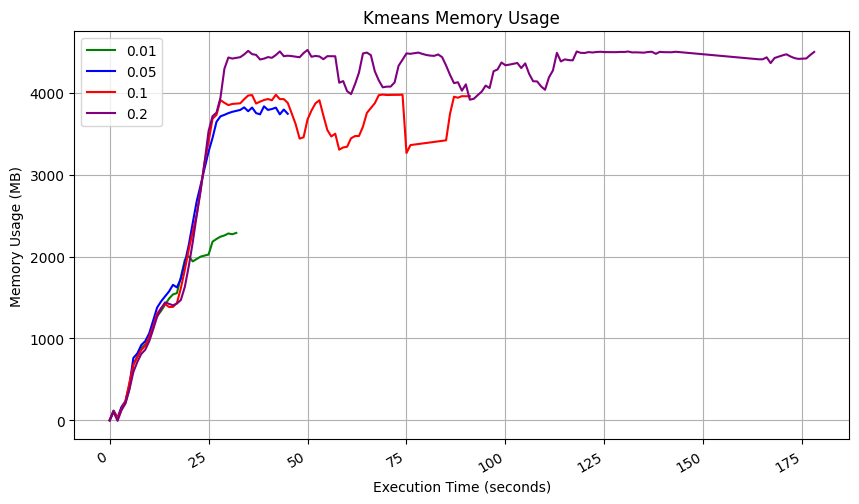

In [973]:
import matplotlib.pyplot as plt
from datetime import datetime

fileNames = ['../memory_logs/kmeans0.01.log','../memory_logs/kmeans0.05.log', '../memory_logs/kmeans0.1.log', '../memory_logs/kmeans0.2.log']

# Define colors for the plots
colors = ['g', 'b', 'r', 'purple', 'y']

# Initialize a figure for all plots
plt.figure(figsize=(10, 6))

custom_labels = ['0.01', '0.05', '0.1', '0.2']
datasize = [19903883, 995194194, 1990388389, 3980776778]

log_data_kmeans = []

for i, fileName in enumerate(fileNames):
    timestamps = []
    memory_usage = []

    # Read the log file
    with open(fileName, 'r') as file:
        for line in file:
            timestamp_str, memory_str = line.split(' : ')
            timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
            memory = int(memory_str.replace(' MB', ''))
            timestamps.append(timestamp)
            memory_usage.append(memory)

    # Adjust memory usage by subtracting the first value
    first_memory_value = memory_usage[0]
    adjusted_memory_usage = [memory - first_memory_value for memory in memory_usage]
    max_memory_usage = max(adjusted_memory_usage)

    elapsed_seconds = [(timestamp - timestamps[0]).total_seconds() for timestamp in timestamps]
    # Calculate execution time in seconds
    execution_time = timestamps[-1] - timestamps[0]
    execution_time_seconds = execution_time.total_seconds()
    log_data_kmeans.append({
        'execution_time': execution_time,
        'max_memory_usage': max_memory_usage,
        'scale': custom_labels[i],
        'workload': 'kmeans_spark_huge',
        'datasize': datasize[i]
    })
    
    # Plotting the data with different colors
    plt.plot(elapsed_seconds, adjusted_memory_usage, color=colors[i], linestyle='-', label=custom_labels[i])

# Formatting the plot
plt.title('Kmeans Memory Usage')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Memory Usage (MB)')
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [974]:
import pandas as pd

df_kmeans = pd.DataFrame(log_data_kmeans)
#df_bayes = pd.DataFrame(log_data_bayes)
df_pagerank = pd.DataFrame(log_data_pagerank)
df_local = pd.concat([df_pagerank, df_kmeans], ignore_index=True)
df_local['execution_time'] = pd.to_timedelta(df_local['execution_time']).dt.total_seconds()
df_local['max_memory_usage'] = df_local['max_memory_usage'] /1024
df_local

df_local_crispy = df_local

df_local_crispy.iloc[0,1] = 1511/1024
df_local_crispy

,execution_time,max_memory_usage,scale,workload,datasize
0,36.0,1.475586,0.001,pagerank_spark_huge,3179136
1,38.0,1.562500,0.002,pagerank_spark_huge,5323896
2,42.0,1.875000,0.003,pagerank_spark_huge,9648216
3,39.0,1.805664,0.004,pagerank_spark_huge,12910656
4,40.0,2.250000,0.005,pagerank_spark_huge,15977688
5,32.0,2.234375,0.01,kmeans_spark_huge,19903883
6,45.0,3.743164,0.05,kmeans_spark_huge,995194194
7,91.0,3.882812,0.1,kmeans_spark_huge,1990388389
8,178.0,4.415039,0.2,kmeans_spark_huge,3980776778


### Crispy
Following code contains references from https://github.com/dos-group/crispy

In [975]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR

In [976]:
# the cheapest execution with lowest cost (cost_norm = 1)
df_cluster = pd.read_csv('arrow_cluster_jobs.csv')
df_cluster[df_cluster['cost_norm'] == 1][['cost', 'cost_norm', 'mtype', 'memory', 'scaleout','total_memory', 'algorithm', 'framework', 'size', 'job', 'input_size']]

,cost,cost_norm,mtype,memory,scaleout,total_memory,algorithm,framework,size,job,input_size
109,0.201045,1.0,m4.2xlarge,32.00,10,320.0,linear,spark,huge,linear_spark_huge,252713848366
145,0.277800,1.0,r4.xlarge,30.50,16,488.0,bayes,spark,huge,bayes_spark_huge,301308616772
380,0.262450,1.0,m4.xlarge,16.00,4,64.0,lr,spark,huge,lr_spark_huge,240005901008
485,0.172284,1.0,m4.2xlarge,32.00,8,256.0,kmeans,spark,huge,kmeans_spark_huge,200818183723
601,0.211926,1.0,c4.large,3.75,4,15.0,terasort,hadoop,huge,terasort_hadoop_huge,50000000000
716,0.125687,1.0,m4.xlarge,16.00,6,96.0,pagerank,spark,huge,pagerank_spark_huge,2993586581
724,0.546261,1.0,c4.large,3.75,4,15.0,pagerank,hadoop,bigdata,pagerank_hadoop_bigdata,6104217589
738,0.376506,1.0,r4.2xlarge,61.00,8,488.0,kmeans,spark,bigdata,kmeans_spark_bigdata,401636367057
798,0.666628,1.0,r4.xlarge,30.50,4,122.0,lr,spark,bigdata,lr_spark_bigdata,480011800208
844,0.397372,1.0,c4.large,3.75,8,30.0,terasort,hadoop,bigdata,terasort_hadoop_bigdata,100000000000


In [977]:
def get_train_data(job):
    df_train = df_local_crispy[df_local_crispy['workload'] == job]
    X_train = df_train['datasize'].to_numpy().reshape(-1,1)
    y_train = df_train['max_memory_usage'].to_numpy()
    
    df_test = df_cluster[df_cluster['job'] == job]
    X_test = [[df_test.iloc[0]['input_size']]]
    
    return X_train, y_train, X_test 

In [978]:
mem_overhead = {'spark': 2.5e9}  # Ubuntu + framework

def possible_configs(job, mem_req=0):
    filter1 = df_cluster['job'] == job 
    total_mem_req = mem_req + df_cluster['scaleout'] * 2.5
    filter2 = df_cluster['total_memory']*1 > total_mem_req
    df_configs = df_cluster[filter1 & filter2][['mtype', 'scaleout']]
    #print(df_configs[['mtype', 'scaleout']])
    return df_configs


def crispy(job):
    X_train, y_train, X_test = get_train_data(job)
    model = LR()
    model.fit(X_train,y_train)
    mem_req = model.predict(X_test)[0] if model.score(X_train, y_train) > .7 else 0
    print(mem_req)
    #print(model.score(X_train, y_train))
    return bfa(job, mem_req) or bfa(job, 0)

## next steps: using crispy approach retreive all possible configs, among them select the one that has the lowest execution cost the best for other jobs ("best_of_all" principle)

In [979]:
#map an average cost of all other executions to the cluster configuration that fullfils minimal memory requirement for the current job
def get_cost_norm(row, col_name, job):
    match = df_cluster[(df_cluster['mtype'] == row['mtype']) & (df_cluster['scaleout'] == row[col_name]) & (df_cluster['job'] != job) & (df_cluster['framework'] == 'spark') ]
    if not match.empty:
        print(len(match.index))
        mean_cost = match['cost_norm'].min()
        return mean_cost
    else:
        return row[col_name]

In [980]:
# Select the vm-types with the cheapest average execution of other workloads
def smallest_machine_config(job, mem_req):
    config_candidates = possible_configs(job, mem_req)
    config_candidates['costs'] = config_candidates.apply(lambda row: get_cost_norm(row, 'scaleout', job), axis=1)
    print(config_candidates)
    df_unique = config_candidates.loc[config_candidates.groupby('mtype')['costs'].idxmin()]
    return df_unique

jobs = ['kmeans_spark_huge', 'pagerank_spark_huge']
combined_results = []

for job in jobs:
    
    #Crispy Exectuion, that finds configuration with the smallest amount of machines
    X_train, y_train, X_test = get_train_data(job)
    model = LR()
    model.fit(X_train, y_train)
    mem_req = model.predict(X_test)[0] if model.score(X_train, y_train) > .7 else 0
    smallest_config = smallest_machine_config(job, mem_req)
    
    # Create a DataFrame for the smallest configuration and include the job name
    df_config = pd.DataFrame(smallest_config, columns=['mtype', 'scaleout'])
    df_config['job'] = job  # Add a column for the job name
    combined_results.append(df_config)
    

df_combined_configs = pd.concat(combined_results, ignore_index=True)

# Pivot the dataframe to match the same format as Blink 
df_pivot = df_combined_configs.pivot_table(index='mtype', columns='job', values='scaleout', aggfunc='min')
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
df_pivot.rename(columns={
    'kmeans_spark_huge': 'kmeans_scaleout', 
    'pagerank_spark_huge': 'pagerank_scaleout'
}, inplace=True)

df_crispy_unordered = df_pivot

# Comparing to the original Crispy approach it might be more benefcial, since it doesn't require historical data about others executions

10
10
11
11
11
10
10
11
11
11
11
10
10
11
11
10
11
10
10
11
11
11
11
10
11
11
11
11
10
11
11
11
10
11
11
10
11
           mtype  scaleout     costs
39      r4.large         8  1.155922
71     r4.xlarge         4  1.000000
118   m4.2xlarge         6  1.157019
171   r4.2xlarge        12  1.070572
195   r4.2xlarge         8  1.000000
206    r4.xlarge         6  1.120021
229   m4.2xlarge         4  1.171150
298    r4.xlarge        20  1.055964
299    r4.xlarge        24  1.120176
310    m4.xlarge        16  1.225387
315    r4.xlarge        10  1.054005
363     r4.large        10  1.118853
400   c4.2xlarge         8  1.106330
402     m4.large        32  1.179539
404    r4.xlarge        16  1.000000
485   m4.2xlarge         8  1.148628
524    m4.xlarge        24  1.168340
650   m4.2xlarge        10  1.000000
656     r4.large        12  1.187383
670    r4.xlarge        12  1.182705
674    m4.xlarge        10  1.000000
682   c4.2xlarge        10  1.080963
686   c4.2xlarge        12  1.111477
7

In [981]:
df_crispy_unordered 
custom_order = [
    'm4.large', 'm4.xlarge', 'm4.2xlarge',
    'r4.large', 'r4.xlarge', 'r4.2xlarge',
    'c4.large', 'c4.xlarge', 'c4.2xlarge'
]

# Convert 'mtype' to a categorical type with the custom order
df_crispy_unordered['mtype'] = pd.Categorical(df_crispy_unordered['mtype'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order of 'mtype'
df_sorted = df_crispy_unordered.sort_values('mtype').reset_index(drop=True)
df_sorted['mtype'] = df_sorted['mtype'].str.replace(r'arge$', '', regex=True)

df_sorted
df_crispy = df_sorted
df_sorted.to_csv('crsipy-eval.csv', index=False)